In [1]:
##################################################################
#
# QBTopPerformerModel.ipynb
#
# Description: Train a classification model that classifies a QB
#   with a performance rank with respect to fantasy value last
#   season.
# Author: Ken Reeser
# Since: 2018-08-28
#
##################################################################

%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import math
import sys, os

sys.path.append('.\\src\\model_util')
from FantasyFootballOffense import calcPastOffensiveFantasyValue

lastyear = 2017
statList = list()

#1. Get the game stats for each QB for every year they have played
#profileDf = pd.read_json('C:\\Users\\kjree\\Workspaces\\nfl-player-stats\\profile_QB_train.json')

gamesDf = pd.read_json('C:\\Users\\kjree\\Workspaces\\nfl-player-stats\\games_QB_train.json')
gamesDf.sort_values(by=['player_id'])

#2. Loop through QB player_id's and calculate fantasy values last year
statDf = pd.DataFrame(columns=['player_id','value_last_season'])
for player_id in gamesDf.player_id.unique():
    career = gamesDf.loc[gamesDf.player_id == player_id]
    if career is not None and len(career) > 0:
        valueLastSeason = calcPastOffensiveFantasyValue(career,lastyear)
        if(valueLastSeason > 0):
            statList.append((player_id,valueLastSeason))
            #3. Perform fantasy value study for the QB position last year; then comment this out.
            #playerName = profileDf.loc[profileDf.player_id == player_id].name.get_values()
            #print("Name: ", playerName, "Value: ", valueLastSeason)
statDf = pd.concat([pd.DataFrame([i], columns=['player_id','value_last_season']) for i in statList], ignore_index=True)


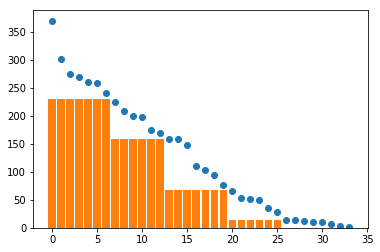

Model is SAVED!


In [26]:
#3. Perform fantasy value study for the QB position last year
#Sort Data
statDf.sort_values(by=['value_last_season'],ascending=False,inplace=True)
#Scatter plot the fantasy values last season for the QB training data
plt.scatter(np.arange(0,34,1), statDf.value_last_season)
#plt.show()

#4. Classify fantasy value last year
# Calculating 20th,40th,60th,80th,and 100th quantiles
rank, qbins = pd.qcut(statDf['value_last_season'],q=[0.0,0.2,0.4,0.6,0.8,1.0],retbins=True)
statDf['rank'] = [x.left for x in pd.cut(statDf['value_last_season'], bins=qbins, include_lowest=True)]
statDf['rank'] = statDf['rank'].astype(np.int64)
#print(statDf)

plt.bar(np.arange(0,34,1),statDf['rank'])
plt.show()

#5. Save the QB top performer model to disk
filename = "C:\\Users\\kjree\\Workspaces\\ml-fantasy-football-model\\src\\model_data\\qb_top_performer_model.pkl"
pickle.dump(qbins, open(filename, 'wb'))
print("Model is SAVED!")
